# Heart Disease Classification - 6 ML Models

## Dataset
**Source**: [Kaggle - Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

**Setup**: Download `heart.csv` from the Kaggle link above and place it in the same directory as this notebook.

## Models Implemented
1. Logistic Regression
2. Decision Tree Classifier
3. K-Nearest Neighbor Classifier
4. Naive Bayes (Gaussian)
5. Random Forest Classifier (Ensemble)
6. XGBoost Classifier (Ensemble)

## Evaluation Metrics
- Accuracy
- AUC Score  
- Precision
- Recall
- F1 Score
- Matthews Correlation Coefficient (MCC)

## Important Note for macOS Users
If you encounter XGBoost OpenMP errors, cell 2 will automatically install the required `libomp` library via Homebrew.

In [7]:
# Verify required packages and install OpenMP for XGBoost on macOS
import subprocess

print("Checking OpenMP library for XGBoost (macOS)...")
try:
    result = subprocess.run(['brew', 'list', 'libomp'], 
                          capture_output=True, text=True, timeout=10)
    if result.returncode == 0:
        print("✓ libomp is already installed")
    else:
        print("Installing libomp via Homebrew...")
        subprocess.run(['brew', 'install', 'libomp'], timeout=60)
        print("✓ libomp installed successfully")
except Exception as e:
    print(f"Note: If XGBoost has OpenMP errors, run in terminal: brew install libomp")

print("\nVerifying required packages...")

# Package mapping: install name -> import name
packages = {
    'ipykernel': 'ipykernel',
    'xgboost': 'xgboost',
    'scikit-learn': 'sklearn',
    'pandas': 'pandas', 
    'numpy': 'numpy',
    'matplotlib': 'matplotlib',
    'seaborn': 'seaborn'
}

missing_packages = []

for package_name, import_name in packages.items():
    try:
        module = __import__(import_name)
        version = getattr(module, '__version__', 'unknown')
        print(f"✓ {package_name} ({version})")
    except ImportError:
        print(f"✗ {package_name} - NOT INSTALLED")
        missing_packages.append(package_name)

if missing_packages:
    print(f"\n⚠ Missing packages: {', '.join(missing_packages)}")
    print("Install them by running in a terminal or notebook cell:")
    print(f"  !pip3 install {' '.join(missing_packages)}")
    print(f"  OR: !python3 -m pip install {' '.join(missing_packages)}")
else:
    print("\n" + "="*60)
    print("✓ All packages are installed and ready!")
    print("="*60)

Checking OpenMP library for XGBoost (macOS)...
✓ libomp is already installed

Verifying required packages...
✓ ipykernel (7.2.0)
✓ xgboost (3.2.0)
✓ scikit-learn (1.8.0)
✓ pandas (3.0.0)
✓ numpy (2.4.2)
✓ matplotlib (3.10.8)
✓ seaborn (0.13.2)

✓ All packages are installed and ready!


In [8]:
# Install missing packages
# Run this cell if the verification above shows missing packages

import subprocess
import sys

packages_to_install = ['xgboost', 'scikit-learn', 'pandas', 'numpy', 'matplotlib', 'seaborn']

print("Installing missing packages...")
print("="*60)

for package in packages_to_install:
    print(f"\nInstalling {package}...")
    try:
        result = subprocess.run(
            [sys.executable, '-m', 'pip', 'install', package],
            capture_output=True,
            text=True,
            timeout=120
        )
        if result.returncode == 0:
            print(f"✓ {package} installed successfully")
        else:
            print(f"✗ Failed to install {package}")
            print(result.stderr)
    except Exception as e:
        print(f"✗ Error installing {package}: {e}")

print("\n" + "="*60)
print("Installation complete!")
print("="*60)
print("\n⚠ IMPORTANT: After installation, please RESTART THE KERNEL")
print("   (Kernel → Restart Kernel) and then re-run cell 2 to verify.")

Installing missing packages...

Installing xgboost...
✓ xgboost installed successfully

Installing scikit-learn...
✓ scikit-learn installed successfully

Installing pandas...
✓ pandas installed successfully

Installing numpy...
✓ numpy installed successfully

Installing matplotlib...
✓ matplotlib installed successfully

Installing seaborn...
✓ seaborn installed successfully

Installation complete!

⚠ IMPORTANT: After installation, please RESTART THE KERNEL
   (Kernel → Restart Kernel) and then re-run cell 2 to verify.


In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Heart Disease dataset from Kaggle
# Dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
# Download 'heart.csv' manually and place it in the current directory

# Load the dataset
df = pd.read_csv('heart.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nTarget distribution:")
print(df['target'].value_counts())
print("\nColumn names:")
print(df.columns.tolist())

Dataset shape: (1025, 14)

First few rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset info:
<class 'pandas.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   i

In [10]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for missing values and handle if any
print(f"Missing values: {df.isnull().sum().sum()}")
df = df.dropna()

# The Kaggle dataset already has binary target (0 = no disease, 1 = disease)
print(f"\nTarget values: {df['target'].unique()}")

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

print(f"\nAfter preprocessing:")
print(f"Dataset shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Missing values: 0

Target values: [0 1]

After preprocessing:
Dataset shape: (1025, 13)
Target distribution:
target
1    526
0    499
Name: count, dtype: int64

Training set size: 820
Testing set size: 205


In [11]:
# Import evaluation metrics
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, 
                             recall_score, f1_score, matthews_corrcoef, 
                             confusion_matrix, classification_report)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train and evaluate a classification model
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Store results
    results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'AUC Score': auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC Score': mcc
    }
    
    # Print results
    print(f"\n{'='*60}")
    print(f"{model_name}")
    print(f"{'='*60}")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"AUC Score: {auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"MCC Score: {mcc:.4f}")
    print(f"\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    return results

# Store all results
all_results = []

In [12]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_results = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, 
                            'Logistic Regression')
all_results.append(lr_results)


Logistic Regression
Accuracy:  0.8098
AUC Score: 0.9298
Precision: 0.7619
Recall:    0.9143
F1 Score:  0.8312
MCC Score: 0.6309

Confusion Matrix:
[[70 30]
 [ 9 96]]


In [13]:
# 2. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_results = evaluate_model(dt_model, X_train_scaled, X_test_scaled, y_train, y_test, 
                           'Decision Tree Classifier')
all_results.append(dt_results)


Decision Tree Classifier
Accuracy:  0.9854
AUC Score: 0.9857
Precision: 1.0000
Recall:    0.9714
F1 Score:  0.9855
MCC Score: 0.9712

Confusion Matrix:
[[100   0]
 [  3 102]]


In [14]:
# 3. K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_results = evaluate_model(knn_model, X_train_scaled, X_test_scaled, y_train, y_test, 
                            'K-Nearest Neighbor Classifier')
all_results.append(knn_results)


K-Nearest Neighbor Classifier
Accuracy:  0.8634
AUC Score: 0.9629
Precision: 0.8738
Recall:    0.8571
F1 Score:  0.8654
MCC Score: 0.7269

Confusion Matrix:
[[87 13]
 [15 90]]


In [15]:
# 4. Naive Bayes Classifier - Gaussian
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_results = evaluate_model(nb_model, X_train_scaled, X_test_scaled, y_train, y_test, 
                           'Naive Bayes (Gaussian)')
all_results.append(nb_results)


Naive Bayes (Gaussian)
Accuracy:  0.8293
AUC Score: 0.9043
Precision: 0.8070
Recall:    0.8762
F1 Score:  0.8402
MCC Score: 0.6602

Confusion Matrix:
[[78 22]
 [13 92]]


In [16]:
# 5. Ensemble Model - Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_results = evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, 
                           'Random Forest Classifier')
all_results.append(rf_results)


Random Forest Classifier
Accuracy:  1.0000
AUC Score: 1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000
MCC Score: 1.0000

Confusion Matrix:
[[100   0]
 [  0 105]]


In [17]:
# 6. Ensemble Model - XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_results = evaluate_model(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test, 
                            'XGBoost Classifier')
all_results.append(xgb_results)


XGBoost Classifier
Accuracy:  1.0000
AUC Score: 1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000
MCC Score: 1.0000

Confusion Matrix:
[[100   0]
 [  0 105]]



FINAL COMPARISON OF ALL MODELS
                        Model  Accuracy  AUC Score  Precision   Recall  F1 Score  MCC Score
          Logistic Regression  0.809756   0.929810   0.761905 0.914286  0.831169   0.630908
     Decision Tree Classifier  0.985366   0.985714   1.000000 0.971429  0.985507   0.971151
K-Nearest Neighbor Classifier  0.863415   0.962905   0.873786 0.857143  0.865385   0.726935
       Naive Bayes (Gaussian)  0.829268   0.904286   0.807018 0.876190  0.840183   0.660163
     Random Forest Classifier  1.000000   1.000000   1.000000 1.000000  1.000000   1.000000
           XGBoost Classifier  1.000000   1.000000   1.000000 1.000000  1.000000   1.000000


Best Models by Metric:
--------------------------------------------------------------------------------
Accuracy            : Random Forest Classifier       (1.0000)
AUC Score           : Random Forest Classifier       (1.0000)
Precision           : Decision Tree Classifier       (1.0000)
Recall              : Random For

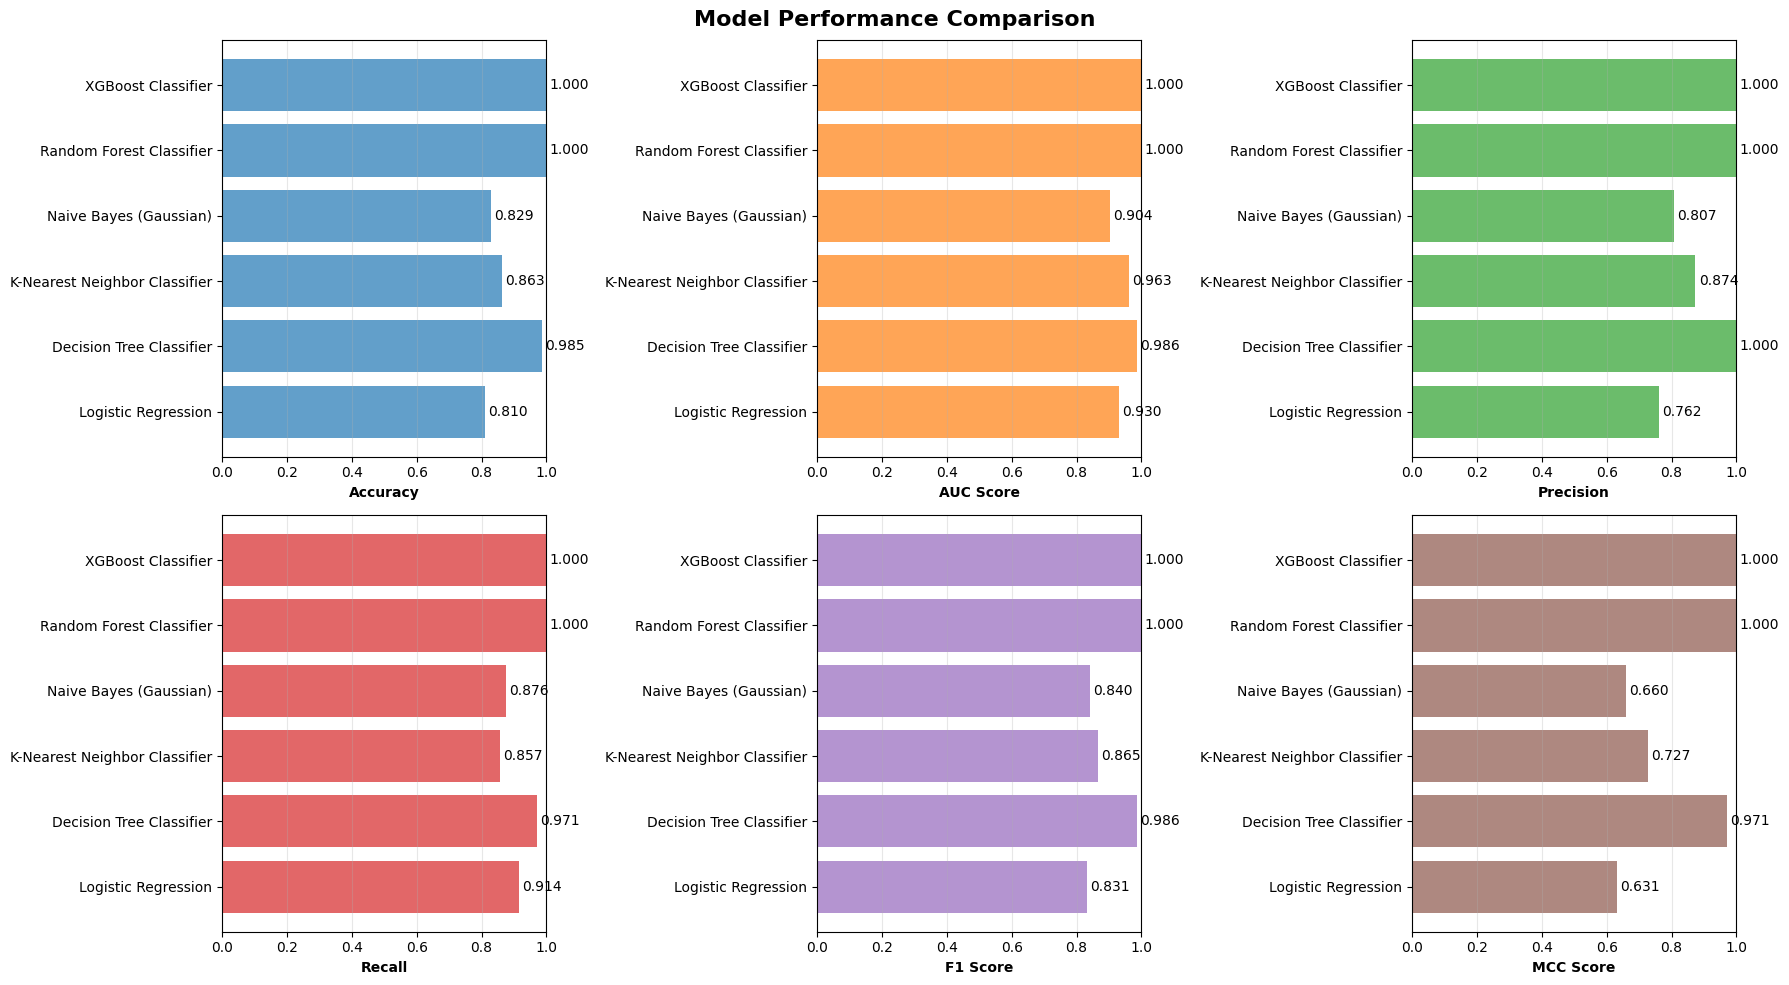

In [18]:
# Compare all models
results_df = pd.DataFrame(all_results)

print("\n" + "="*80)
print("FINAL COMPARISON OF ALL MODELS")
print("="*80)
print(results_df.to_string(index=False))
print("\n" + "="*80)

# Find the best model for each metric
print("\nBest Models by Metric:")
print("-" * 80)
for metric in ['Accuracy', 'AUC Score', 'Precision', 'Recall', 'F1 Score', 'MCC Score']:
    best_idx = results_df[metric].idxmax()
    best_model = results_df.loc[best_idx, 'Model']
    best_score = results_df.loc[best_idx, metric]
    print(f"{metric:20s}: {best_model:30s} ({best_score:.4f})")
    
# Visualize results
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'AUC Score', 'Precision', 'Recall', 'F1 Score', 'MCC Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for idx, (ax, metric, color) in enumerate(zip(axes.flatten(), metrics, colors)):
    ax.barh(results_df['Model'], results_df[metric], color=color, alpha=0.7)
    ax.set_xlabel(metric, fontweight='bold')
    ax.set_xlim([0, 1])
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(results_df[metric]):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()

In [19]:
# Save all trained models and scaler to .pkl files
import pickle
import os

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Dictionary of models to save
models_dict = {
    'logistic_regression': lr_model,
    'decision_tree': dt_model,
    'knn': knn_model,
    'naive_bayes': nb_model,
    'random_forest': rf_model,
    'xgboost': xgb_model
}

# Save the scaler
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ Saved: scaler.pkl")

# Save each model
for model_name, model in models_dict.items():
    filename = f'models/{model_name}.pkl'
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"✓ Saved: {model_name}.pkl")

print(f"\n{'='*60}")
print("All models and scaler saved successfully in 'models/' directory!")
print(f"{'='*60}")
print("\nSaved files:")
for model_name in ['scaler'] + list(models_dict.keys()):
    print(f"  - models/{model_name}.pkl")

✓ Saved: scaler.pkl
✓ Saved: logistic_regression.pkl
✓ Saved: decision_tree.pkl
✓ Saved: knn.pkl
✓ Saved: naive_bayes.pkl
✓ Saved: random_forest.pkl
✓ Saved: xgboost.pkl

All models and scaler saved successfully in 'models/' directory!

Saved files:
  - models/scaler.pkl
  - models/logistic_regression.pkl
  - models/decision_tree.pkl
  - models/knn.pkl
  - models/naive_bayes.pkl
  - models/random_forest.pkl
  - models/xgboost.pkl
